In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import joblib

In [38]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

In [39]:
print("FOOD NUTRITION ESTIMATOR")
df = pd.read_csv('food_nutrition_data.csv')
print(f"\nDataset Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

FOOD NUTRITION ESTIMATOR

Dataset Shape: (500, 33)

First few rows:
   food_id  chicken_breast  beef  pork  salmon  tuna  eggs  rice  pasta  \
0        0               0     0     0       0     0     0     0      0   
1        1               0     0     0       0     0     0     0      0   
2        2               0    60     0      47   154    91     0      0   
3        3               0   162     0       0     0   190     0      0   
4        4               0     0     0       0     0     0     0    191   

   bread  ...  oats  banana  apple  avocado  nuts  beans  lentils  yogurt  \
0    189  ...     0       0     70        0     0      0        0     127   
1      0  ...     0       0      0        0   181      0        0      33   
2      0  ...     0       0      0        0    31      0        0       0   
3      0  ...     0       0      0        0    55     32      179       0   
4      0  ...     0      78      0        0   137      0        0       0   

   total_calories 

In [40]:
print(f"\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   food_id         500 non-null    int64  
 1   chicken_breast  500 non-null    int64  
 2   beef            500 non-null    int64  
 3   pork            500 non-null    int64  
 4   salmon          500 non-null    int64  
 5   tuna            500 non-null    int64  
 6   eggs            500 non-null    int64  
 7   rice            500 non-null    int64  
 8   pasta           500 non-null    int64  
 9   bread           500 non-null    int64  
 10  potato          500 non-null    int64  
 11  sweet_potato    500 non-null    int64  
 12  broccoli        500 non-null    int64  
 13  spinach         500 non-null    int64  
 14  tomato          500 non-null    int64  
 15  carrot          500 non-null    int64  
 16  onion           500 non-null    int64  
 17  cheese          500 

In [41]:
print(f"\nBasic Statistics:")
print(df.describe())


Basic Statistics:
          food_id  chicken_breast        beef        pork      salmon  \
count  500.000000      500.000000  500.000000  500.000000  500.000000   
mean   249.500000       13.244000   14.408000   13.918000   15.252000   
std    144.481833       40.120466   42.676224   40.989017   42.436378   
min      0.000000        0.000000    0.000000    0.000000    0.000000   
25%    124.750000        0.000000    0.000000    0.000000    0.000000   
50%    249.500000        0.000000    0.000000    0.000000    0.000000   
75%    374.250000        0.000000    0.000000    0.000000    0.000000   
max    499.000000      199.000000  194.000000  196.000000  200.000000   

             tuna        eggs        rice       pasta       bread  ...  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  ...   
mean    13.210000   14.636000   14.734000   14.678000   18.188000  ...   
std     40.333454   41.887093   42.330734   44.407549   48.907756  ...   
min      0.000000    0.0000

In [42]:
print(f"\nMissing Values:")
print(df.isnull().sum().sum())


Missing Values:
0


Text(0.5, 1.0, 'Distribution of Calorie Count')

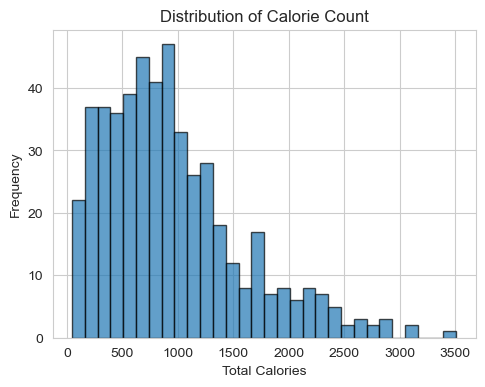

In [43]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(df['total_calories'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Total Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calorie Count')

Text(0.5, 1.0, 'Boxplot of Calorie Count')

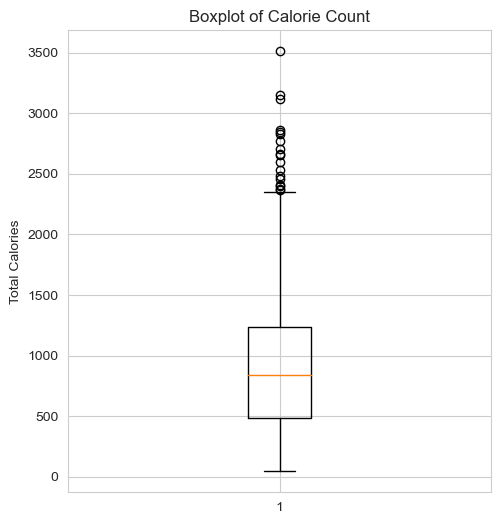

In [44]:
plt.subplot(1, 2, 2)
plt.boxplot(df['total_calories'])
plt.ylabel('Total Calories')
plt.title('Boxplot of Calorie Count')

In [45]:
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

In [46]:
ingredient_cols = [col for col in df.columns if col not in ['food_id', 'total_calories', 'total_weight']]
avg_usage = df[ingredient_cols].mean().sort_values(ascending=False)
print(f"\nTop 10 Most Used Ingredients (Average grams):")
print(avg_usage.head(10))


Top 10 Most Used Ingredients (Average grams):
flour      18.904
bread      18.188
lentils    17.222
oats       16.318
potato     15.880
apple      15.846
beans      15.602
nuts       15.310
salmon     15.252
spinach    15.200
dtype: float64


In [47]:
correlations = df[ingredient_cols].corrwith(df['total_calories']).sort_values(ascending=False)
print(f"\nTop 10 Ingredients Correlated with Calories:")
print(correlations.head(10))


Top 10 Ingredients Correlated with Calories:
olive_oil    0.513743
butter       0.406937
nuts         0.348173
oats         0.295821
sugar        0.229366
cheese       0.214827
flour        0.199811
bread        0.175989
salmon       0.135656
beef         0.120839
dtype: float64


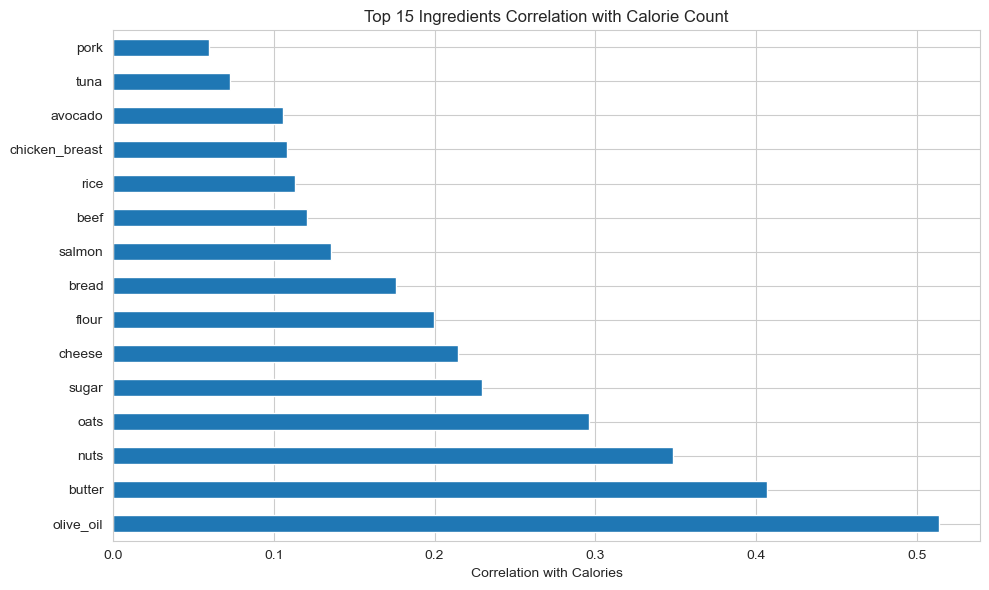

In [48]:
plt.figure(figsize=(10,6))
correlations.head(15).plot(kind='barh')
plt.xlabel('Correlation with Calories')
plt.title('Top 15 Ingredients Correlation with Calorie Count')
plt.tight_layout()
plt.show()

In [49]:
X = df[ingredient_cols]
y = df['total_calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 400
Test set size: 100


In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.1),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}
result= {}

In [52]:
print("MODEL TRAINING AND EVALUATION")

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name in ['Random Forest', 'Gradient Boosting']:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    result[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'predictions': y_pred
    }
    
    print(f"{name} Results:")
    print(f"  MAE:  {mae:.2f} calories")
    print(f"  RMSE: {rmse:.2f} calories")
    print(f"  R²:   {r2:.4f}")

MODEL TRAINING AND EVALUATION

Training Linear Regression...
Linear Regression Results:
  MAE:  8.36 calories
  RMSE: 10.62 calories
  R²:   0.9997

Training Ridge Regression...
Ridge Regression Results:
  MAE:  8.34 calories
  RMSE: 10.61 calories
  R²:   0.9997

Training Lasso Regression...
Lasso Regression Results:
  MAE:  8.28 calories
  RMSE: 10.55 calories
  R²:   0.9997

Training Random Forest...
Random Forest Results:
  MAE:  205.19 calories
  RMSE: 289.87 calories
  R²:   0.8064

Training Gradient Boosting...
Gradient Boosting Results:
  MAE:  178.18 calories
  RMSE: 224.43 calories
  R²:   0.8839


In [53]:
comparison_df = pd.DataFrame({
    'Model': result.keys(),
    'MAE': [result[m]['MAE'] for m in result],
    'RMSE': [result[m]['RMSE'] for m in result],
    'R²': [result[m]['R2'] for m in result]
})

print("MODEL COMPARISON")
print(comparison_df.to_string(index=False))

MODEL COMPARISON
            Model        MAE       RMSE       R²
Linear Regression   8.364434  10.624974 0.999740
 Ridge Regression   8.338596  10.612880 0.999740
 Lasso Regression   8.279406  10.552139 0.999743
    Random Forest 205.191228 289.872860 0.806371
Gradient Boosting 178.177439 224.434216 0.883926


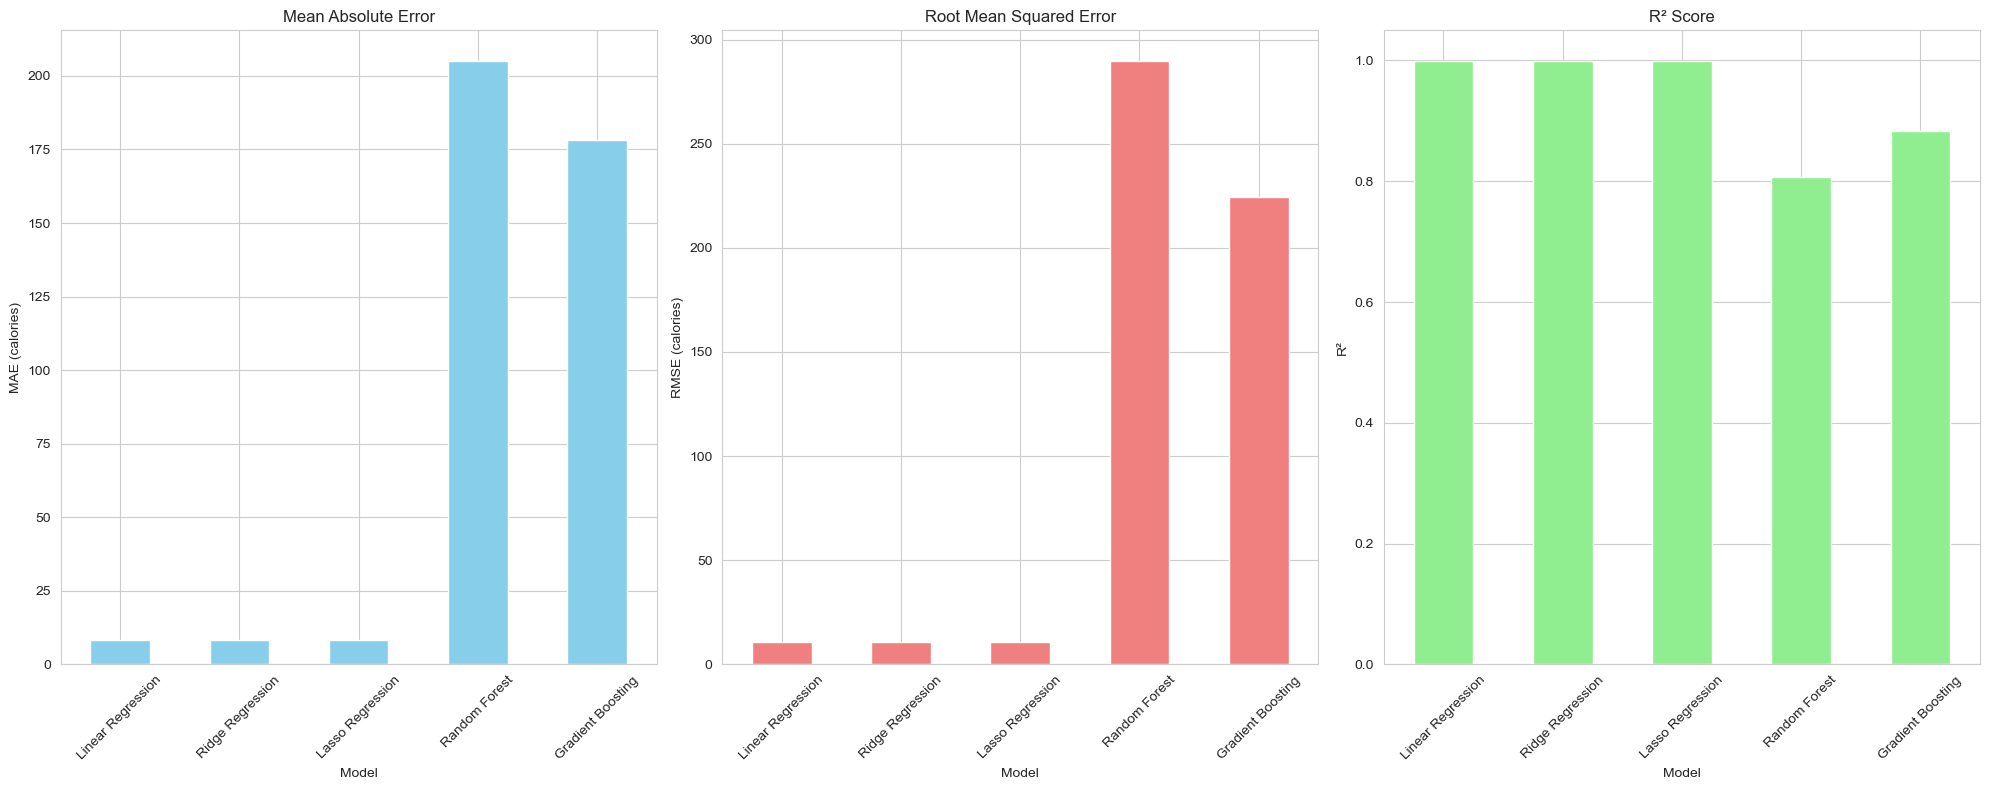

In [54]:
fig, axes = plt.subplots(1,3, figsize=(20, 8))
comparison_df.plot(x='Model', y='MAE', kind='bar', ax=axes[0], legend=False, color='skyblue')
axes[0].set_title('Mean Absolute Error')
axes[0].set_ylabel('MAE (calories)')
axes[0].tick_params(axis='x', rotation=45)

comparison_df.plot(x='Model', y='RMSE', kind='bar', ax=axes[1], legend=False, color='lightcoral')
axes[1].set_title('Root Mean Squared Error')
axes[1].set_ylabel('RMSE (calories)')
axes[1].tick_params(axis='x', rotation=45)

comparison_df.plot(x='Model', y='R²', kind='bar', ax=axes[2], legend=False, color='lightgreen')
axes[2].set_title('R² Score')
axes[2].set_ylabel('R²')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [55]:
best_model_name = comparison_df.loc[comparison_df['R²'].idxmax(), 'Model']
print(f"\n Best Model: {best_model_name}")


 Best Model: Lasso Regression


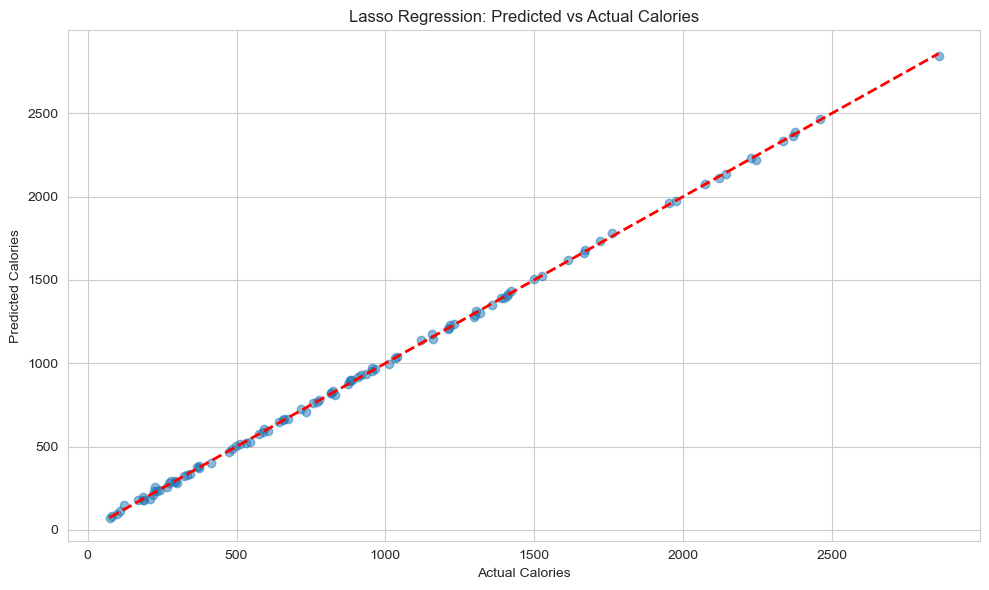

In [56]:
best_model = models[best_model_name]

y_pred_best = result[best_model_name]['predictions']

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title(f'{best_model_name}: Predicted vs Actual Calories')
plt.tight_layout()
plt.show()

In [57]:
joblib.dump(best_model, 'nutrition_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [58]:
import json
with open('ingredients.json', 'w') as f:
    json.dump(ingredient_cols, f)
    
print(f"\n Model saved as 'nutrition_model.pkl'")
print(f" Scaler saved as 'scaler.pkl'")
print(f" Ingredients saved as 'ingredients.json'")


 Model saved as 'nutrition_model.pkl'
 Scaler saved as 'scaler.pkl'
 Ingredients saved as 'ingredients.json'


In [35]:
def predict_calories(ingredient_amounts, model, scaler, ingredient_list):
    
    
    features = []
    for ingredient in ingredient_list:
        features.append(ingredient_amounts.get(ingredient, 0))
    
    features = np.array(features).reshape(1, -1)
    
   
    if best_model_name not in ['Random Forest', 'Gradient Boosting']:
        features = scaler.transform(features)
    
    
    prediction = model.predict(features)[0]
    return max(0, prediction)

test_recipe = {
    'chicken_breast': 150,
    'rice': 100,
    'broccoli': 80,
    'olive_oil': 10
}

predicted_cals = predict_calories(test_recipe, best_model, scaler, ingredient_cols)
print(f"\nTest Prediction:")
print(f"Recipe: {test_recipe}")
print(f"Predicted Calories: {predicted_cals:.2f}")


print("MODEL TRAINING COMPLETE!")


Test Prediction:
Recipe: {'chicken_breast': 150, 'rice': 100, 'broccoli': 80, 'olive_oil': 10}
Predicted Calories: 495.78
MODEL TRAINING COMPLETE!
